## Crime Analysis and Prediction in New York

In [1]:
# import libraries
import pandas as pd
import numpy as np
#pip install geopy
# for geographic locations 
from geopy.geocoders import Nominatim  
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
# model training
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
# read data
df = pd.read_csv("NYPD_Complaint_Data_Historic.csv")

C:\Users\siddh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


#### Data Preprocessing

In [3]:
# checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375993 entries, 0 to 7375992
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [4]:
# data rows
df.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,999937.0,238365.0,NaN,NaN,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1022508.0,261990.0,NaN,NaN,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1034178.0,209758.0,25-44,UNKNOWN,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,RECKLESS ENDANGERMENT 1,COMPLETED,FELONY,BRONX,REAR OF,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,1026412.0,258211.0,18-24,BLACK,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,NaN,OUTSIDE,NaN,N.Y. POLICE DEPT,NaN,NaN,NaN,NaN,1001215.0,193881.0,NaN,NaN,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M


In [5]:
# data summary
df.describe(include='all')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,PARKS_NM,HADEVELOPT,HOUSING_PSA,X_COORD_CD,Y_COORD_CD,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
count,7.375993e+06,7375338,7375945,5671789,5676452,7.373827e+06,7375993,7.375993e+06,7357170,7.369715e+06,7369715,7375986,7375993,7364664,5832193,7335248,7375993,7.369715e+06,27663,346812,566710.0,7.358654e+06,7.358654e+06,2580758,3949299,3815985,163499.000000,7.358654e+06,7.358654e+06,7358654,7369258,163499,5737548,7375684,7375685
unique,NaN,8606,1441,6825,1441,NaN,5479,NaN,71,NaN,422,2,3,5,5,74,25,NaN,1205,279,5087.0,NaN,NaN,111,8,3,NaN,NaN,NaN,198552,8,372,202,8,5
top,NaN,01/01/2010,12:00:00,06/01/2020,12:00:00,NaN,05/29/2007,NaN,PETIT LARCENY,NaN,ASSAULT 3,COMPLETED,MISDEMEANOR,BROOKLYN,INSIDE,STREET,N.Y. POLICE DEPT,NaN,CENTRAL PARK,CASTLE HILL,887.0,NaN,NaN,25-44,BLACK,M,NaN,NaN,NaN,"(40.750430768, -73.989282176)",PATROL BORO BRONX,125 STREET,25-44,UNKNOWN,F
freq,NaN,2476,196362,1461,99181,NaN,1891,NaN,1244155,NaN,640218,7250300,4140720,2186681,3747880,2352311,6556968,NaN,1641,7555,7264.0,NaN,NaN,1016688,1473260,2395200,NaN,NaN,NaN,20668,1600584,8203,2433923,2432937,2887858
mean,5.500260e+08,NaN,NaN,NaN,NaN,6.332321e+01,NaN,2.964090e+02,NaN,4.134606e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.241108e-01,NaN,NaN,NaN,1.004851e+06,2.070959e+05,NaN,NaN,NaN,13.619502,4.073506e+01,-7.392564e+01,NaN,NaN,NaN,NaN,NaN,NaN
std,2.597809e+08,NaN,NaN,NaN,NaN,3.447651e+01,NaN,1.504772e+02,NaN,2.177479e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.733209e+00,NaN,NaN,NaN,2.172117e+04,3.147528e+04,NaN,NaN,NaN,12.487345,8.630425e-02,7.833433e-02,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000001e+08,NaN,NaN,NaN,NaN,1.000000e+00,NaN,1.010000e+02,NaN,1.000000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.110000e+02,1.110000e+02,NaN,NaN,NaN,1.000000,4.011271e+01,-7.751921e+01,NaN,NaN,NaN,NaN,NaN,NaN
25%,3.251027e+08,NaN,NaN,NaN,NaN,4.000000e+01,NaN,1.170000e+02,NaN,2.540000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,9.917540e+05,1.843840e+05,NaN,NaN,NaN,3.000000,4.067272e+01,-7.397294e+01,NaN,NaN,NaN,NaN,NaN,NaN
50%,5.500237e+08,NaN,NaN,NaN,NaN,6.300000e+01,NaN,3.410000e+02,NaN,3.840000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.004411e+06,2.060280e+05,NaN,NaN,NaN,11.000000,4.073210e+01,-7.392724e+01,NaN,NaN,NaN,NaN,NaN,NaN
75%,7.749954e+08,NaN,NaN,NaN,NaN,9.400000e+01,NaN,3.510000e+02,NaN,6.370000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,1.016626e+06,2.351790e+05,NaN,NaN,NaN,30.000000,4.081217e+01,-7.388308e+01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# conversion to datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'], errors='coerce')
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'], errors='coerce')
df['RPT_DT'] = pd.to_datetime(df['RPT_DT'], errors='coerce')

In [7]:
# conversion to time in hours
df['CMPLNT_FR_TM'] = pd.to_datetime(df['CMPLNT_FR_TM']).dt.hour
df['CMPLNT_TO_TM'] = pd.to_datetime(df['CMPLNT_TO_TM'], errors='coerce').dt.hour

In [8]:
# conversion to number
df['HOUSING_PSA'] = pd.to_numeric(df['HOUSING_PSA'], errors='coerce')

In [9]:
# columns with null values
df.isnull().sum()[df.isnull().sum() > 0]

CMPLNT_FR_DT             781
CMPLNT_FR_TM              48
CMPLNT_TO_DT         1704208
CMPLNT_TO_TM         1700917
ADDR_PCT_CD             2166
OFNS_DESC              18823
PD_CD                   6278
PD_DESC                 6278
CRM_ATPT_CPTD_CD           7
BORO_NM                11329
LOC_OF_OCCUR_DESC    1543800
PREM_TYP_DESC          40745
JURISDICTION_CODE       6278
PARKS_NM             7348330
HADEVELOPT           7029181
HOUSING_PSA          6818408
X_COORD_CD             17339
Y_COORD_CD             17339
SUSP_AGE_GROUP       4795235
SUSP_RACE            3426694
SUSP_SEX             3560008
TRANSIT_DISTRICT     7212494
Latitude               17339
Longitude              17339
Lat_Lon                17339
PATROL_BORO             6735
STATION_NAME         7212494
VIC_AGE_GROUP        1638445
VIC_RACE                 309
VIC_SEX                  308
dtype: int64

In [10]:
# drop 7 rows with null CRM_ATPT_CPTD_CD
df = df.dropna(subset=['CRM_ATPT_CPTD_CD'])

In [11]:
# drop rows from years 1900-2005 (fewer rows as compared to recent years)
df = df[df['CMPLNT_FR_DT'].dt.year > 2005]

Every KY_CD id is associated with some specifice offense description (OFNS_DESC). Replacing missing values of OFNS_DESC using KY_CD. 

Only KY_CD = 360 does not have any description associated with it hence there are still 4652 rows with NaN OFNS_DESC.

In [12]:
# handling missing values of OFNS_DESC
df['OFNS_DESC'] = df.groupby('KY_CD')['OFNS_DESC'].fillna(method='ffill')

Some OFNS_DESC have similar values such as 'ADMINISTRATIVE CODE' & 'ADMINISTRATIVE CODES', etc. Replacing it with the one same value. 

In [21]:
# replacing similar values
df['OFNS_DESC'] = df['OFNS_DESC'].replace(['ADMINISTRATIVE CODES','OTHER STATE LAWS (NON PENAL LAW)','KIDNAPPING AND RELATED OFFENSES'],['ADMINISTRATIVE CODE','OTHER STATE LAWS (NON PENAL LA','KIDNAPPING & RELATED OFFENSES'])

Every JURISDICTION_CODE is associated with some specifice jurisdiction description (JURIS_DESC). Replacing missing values of JURISDICTION_CODE using JURIS_DESC. 

Only 1 NaN JURISDICTION_CODE for N.Y. TRANSIT POLICE as it is not available in JURIS_DESC.

In [16]:
# handling missing values of JURISDICTION_CODE
df['JURISDICTION_CODE'] = df.groupby('JURIS_DESC')['JURISDICTION_CODE'].fillna(method='ffill')

Many rows have missing borough names but have information about latitude and longitude.With the help of geocoders, borough names are retrieved using latitudes and longitudes.

In [18]:
# subset of dataframe with rows containing empty borough names but have latitude & longitude information
missing_borough_df = df[df['BORO_NM'].isnull() & (df['Lat_Lon'].isnull() == False)].copy()

In [19]:
# initialize Nominatim API
geolocator = Nominatim(user_agent="geoapiExercises")

# function to fetch borough names
def getBoro(Boro, Latitude, Longitude):
    if pd.isna(Boro):
        if pd.isna(Latitude) == False & pd.isna(Longitude) == False:
            addr = geolocator.reverse(str(Latitude)+","+str(Longitude)).raw['address']
            Boro = addr['suburb'].upper() if 'suburb' in addr else Boro
    return Boro

In [20]:
# applying function to get borough names
missing_borough_df['BORO_NM'] = missing_borough_df.apply(lambda x: getBoro(x['BORO_NM'], x['Latitude'], x['Longitude']), axis=1)

In [22]:
# replacing borough names so that all have same name
missing_borough_df['BORO_NM'] = missing_borough_df['BORO_NM'].replace(['THE BRONX','KINGS COUNTY','QUEENS COUNTY'],['BRONX','BROOKLYN','QUEENS'])

In [23]:
missing_borough_df['BORO_NM'].value_counts(dropna=False)

BROOKLYN         3748
BRONX            2429
NaN              1993
QUEENS           1960
STATEN ISLAND     423
MANHATTAN         161
Name: BORO_NM, dtype: int64

In [25]:
# adding borough names to original dataframe
df.loc[missing_borough_df.index,'BORO_NM'] = missing_borough_df['BORO_NM']

In [26]:
# drop rows (2465) with missing Boro_NM and latitude-longitude information
df = df.dropna(subset=['BORO_NM'])

In [27]:
# drop rows with missing time
df = df.dropna(subset=['CMPLNT_FR_TM'])

There are multiple unnecessary columns either in terms of their use in analysis or because of too many missing values. Columns such as PARKS_NM, HADEVELOPT, TRANSIT_DISTRICT, STATION_NAME, SUSP_AGE_GROUP, VIC_AGE_GROUP, HOUSING_PSA have too many missing or invalid values. Columns such as CMPLNT_NUM, X_COORD_CD, Y_COORD_CD, Latitude, Longitude seem to be unnecessary for further analysis.

In [28]:
# drop unnecessary columns
df.drop(['CMPLNT_NUM', 'CMPLNT_TO_DT', 'CMPLNT_TO_TM', 'RPT_DT', 'PARKS_NM','HADEVELOPT','X_COORD_CD','Y_COORD_CD','TRANSIT_DISTRICT','Latitude','Longitude','Lat_Lon','STATION_NAME', 'HOUSING_PSA','SUSP_AGE_GROUP','VIC_AGE_GROUP'], axis=1, inplace=True)

In [29]:
# adding new columns from complaint date
df['Day']= df['CMPLNT_FR_DT'].dt.weekday #when Monday is 0 and Sunday is 6
df['Month']= df['CMPLNT_FR_DT'].dt.month
df['Year']= df['CMPLNT_FR_DT'].dt.year

In [30]:
# size
df.shape

(7352967, 22)

In [31]:
# preprocessed data
df.head()

,CMPLNT_FR_DT,CMPLNT_FR_TM,ADDR_PCT_CD,KY_CD,OFNS_DESC,PD_CD,PD_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,JURIS_DESC,JURISDICTION_CODE,SUSP_RACE,SUSP_SEX,PATROL_BORO,VIC_RACE,VIC_SEX,Day,Month,Year
0,2019-12-31,17.0,32.0,118,DANGEROUS WEAPONS,793.0,WEAPONS POSSESSION 3,COMPLETED,FELONY,MANHATTAN,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,PATROL BORO MAN NORTH,UNKNOWN,E,1,12,2019
1,2019-12-29,16.0,47.0,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",COMPLETED,FELONY,BRONX,NaN,STREET,N.Y. POLICE DEPT,0.0,NaN,NaN,PATROL BORO BRONX,UNKNOWN,E,6,12,2019
2,2019-12-15,18.0,109.0,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",COMPLETED,VIOLATION,QUEENS,FRONT OF,STREET,N.Y. POLICE DEPT,0.0,UNKNOWN,M,PATROL BORO QUEENS NORTH,WHITE HISPANIC,F,6,12,2019
3,2019-12-28,1.0,47.0,126,MISCELLANEOUS PENAL LAW,117.0,RECKLESS ENDANGERMENT 1,COMPLETED,FELONY,BRONX,REAR OF,STREET,N.Y. POLICE DEPT,0.0,BLACK,M,PATROL BORO BRONX,UNKNOWN,E,5,12,2019
4,2008-09-05,21.0,NaN,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,COMPLETED,FELONY,BROOKLYN,OUTSIDE,NaN,N.Y. POLICE DEPT,0.0,NaN,NaN,NaN,BLACK,M,4,9,2008


In [32]:
# save cleaned dataframe to csv
df.to_csv('cleaned.csv', index=False)

#### Exploratory Data Analysis

Most and least occuring crimes in New York city

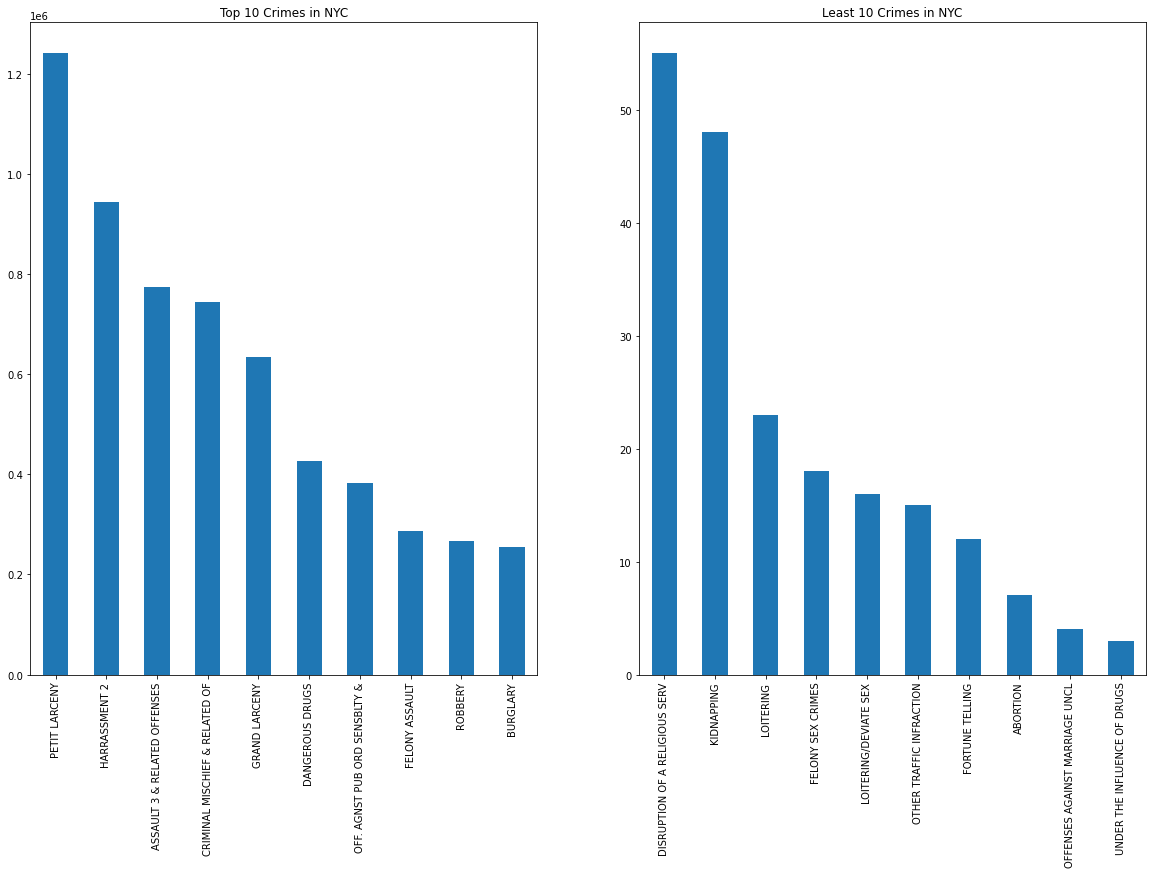

In [33]:
# top 10 offenses
top_10_crimes = df['OFNS_DESC'].value_counts()[:10]
# least 10 offenses
least_10_crimes = df['OFNS_DESC'].value_counts()[-10:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,12))
top_10_crimes.plot(kind='bar', title='Top 10 Crimes in NYC', ax=axes[0])
least_10_crimes.plot(kind='bar', title='Least 10 Crimes in NYC', ax=axes[1])
plt.show()

Crime Status among different Crime Levels

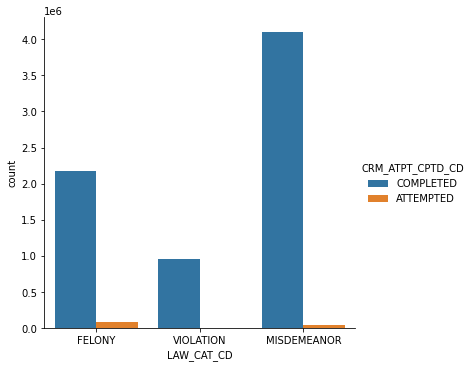

In [34]:
# checking status of crime within each crime level
sns.catplot(kind='count', data=df, x='LAW_CAT_CD', hue='CRM_ATPT_CPTD_CD')
plt.show()

Premises where crimes are frequently occurred -

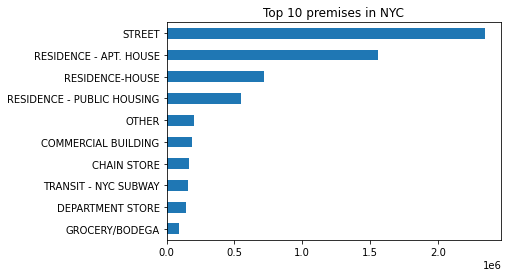

In [35]:
# top 10 crime occurring premises
top_10_premises = df['PREM_TYP_DESC'].value_counts()[:10].sort_values()
top_10_premises.plot(kind='barh', title='Top 10 premises in NYC')
plt.show()

Distribution of Victim Gender -

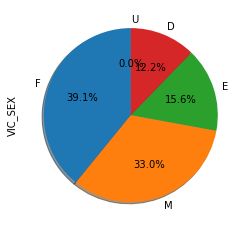

In [36]:
# gender distribution among victims
df['VIC_SEX'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

Crime Analysis by Time

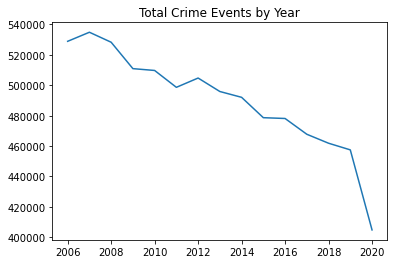

In [37]:
# total number of crimes per year
df['CMPLNT_FR_DT'].dt.year.value_counts().sort_index().plot(kind="line", title = "Total Crime Events by Year")
plt.show()

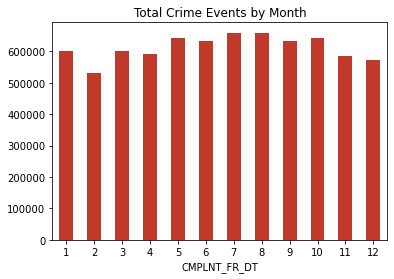

In [38]:
# total crimes per month
df.groupby(df['CMPLNT_FR_DT'].dt.month).size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)
plt.show()

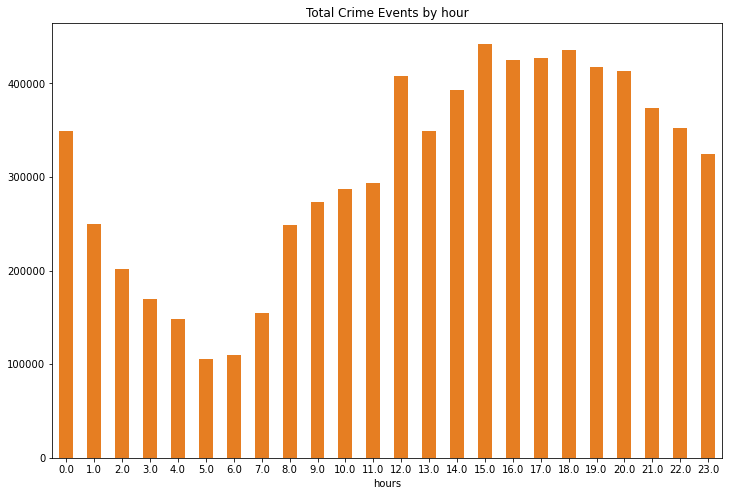

In [44]:
# crimes per hour
df.groupby(df['CMPLNT_FR_TM']).size().plot(figsize=(12,8), kind = 'bar', title ='Total Crime Events by hour', color = '#E67E22', xlabel = 'hours', rot=0)
plt.show()

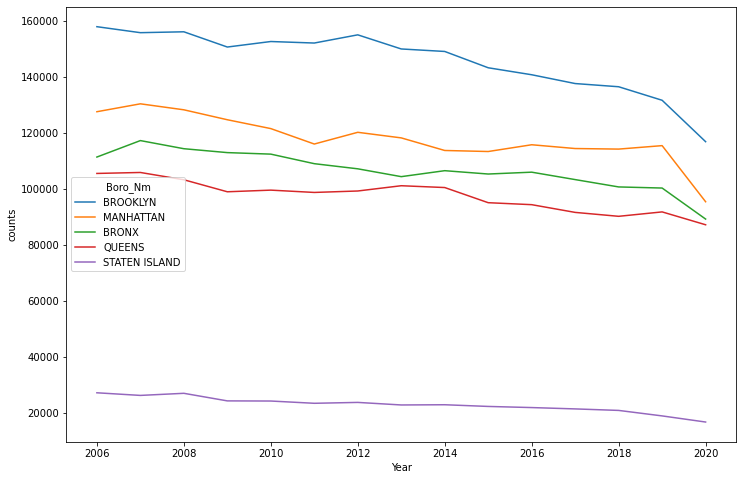

In [38]:
# crime rate by borough
dv = df[['Year', 'BORO_NM']].value_counts().rename_axis(['Year','Boro_Nm']).reset_index(name='counts')
plt.figure(figsize=(12,8))
sns.lineplot(data=dv, x="Year", y="counts", hue="Boro_Nm")
plt.show()

Crime Analysis by Borough

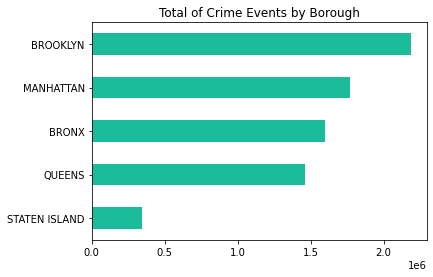

In [45]:
# total crimes in each borough
df['BORO_NM'].value_counts().sort_values().plot(kind="barh", color = '#1ABC9C', title = 'Total of Crime Events by Borough')
plt.show()

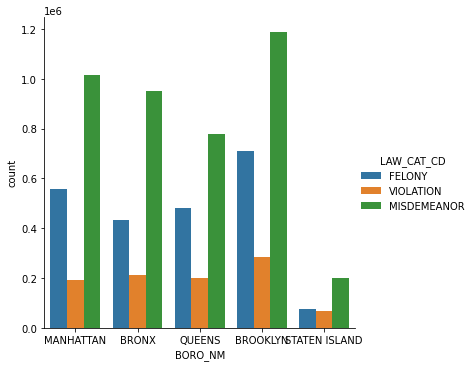

In [47]:
# crime levels in each borough
sns.catplot(kind='count', data=df, x='BORO_NM', hue='LAW_CAT_CD')
plt.show()

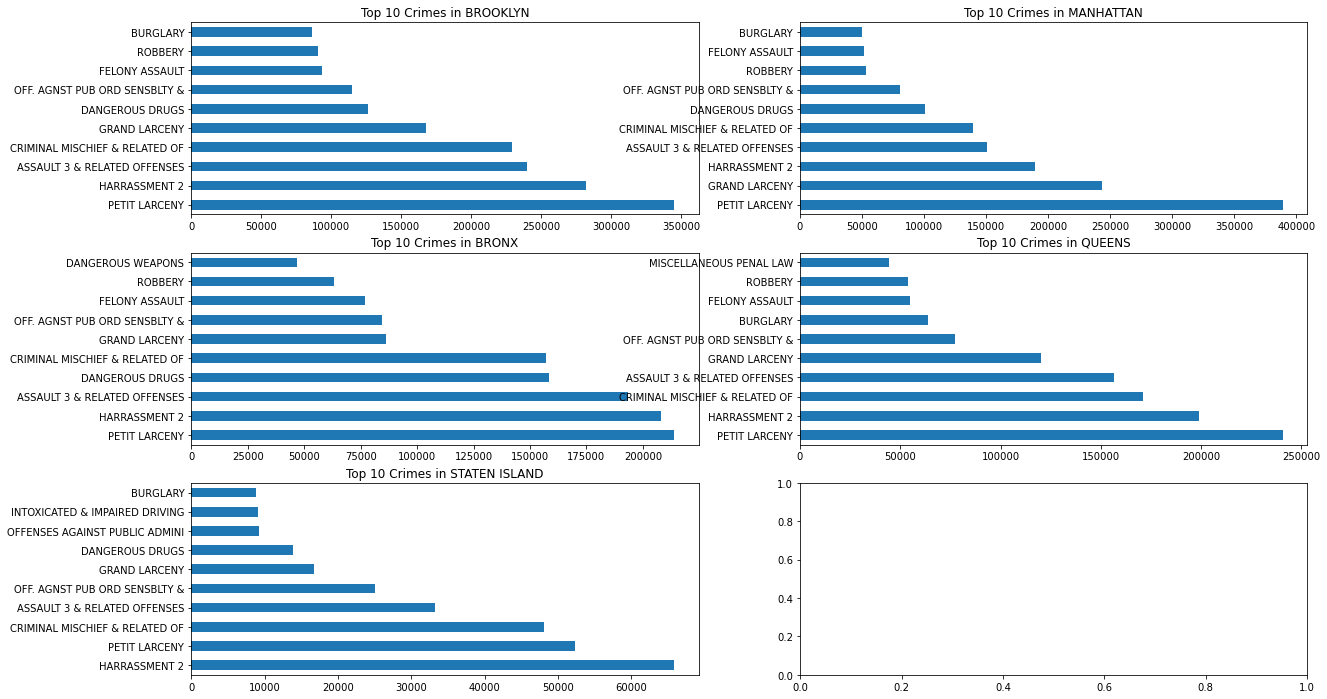

In [48]:
# top 10 offenses in each borough
boroughs = ['BROOKLYN','MANHATTAN','BRONX','QUEENS','STATEN ISLAND']
k = 0
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,12))

for i in range(3):
    for j in range(2):
        if(k < 5):
            top_10_crimes = df[df['BORO_NM']==boroughs[k]]['OFNS_DESC'].value_counts()[:10]
            top_10_crimes.plot(kind='barh', title='Top 10 Crimes in '+boroughs[k], ax=axes[i][j])
            k = k+1

plt.show()

#### Model Training & Evaluation

In [20]:
# reading from cleaned data file
df = pd.read_csv("cleaned.csv")

Since data is imbalanced, focusing on only top 5 KY_CD for crime prediction

In [21]:
# 75 KY_CD classes with only few with million rows
df['KY_CD'].value_counts()

341    1241585
578     943917
344     773601
109     634427
351     618498
361     381838
235     342428
106     285937
105     266246
107     253938
126     176056
359     137428
110     133594
121     125480
347      96331
348      91752
236      88489
117      84419
352      82072
112      73743
118      72878
113      72367
233      69259
340      43550
232      24107
358      23038
353      21946
343      20681
104      20634
355      18153
114      17594
116      16567
360      15942
365      14557
111      13150
678      11485
364       7835
125       7074
101       4886
231       3844
238       3441
124       2921
350       2920
345       1865
675       1713
342       1326
346       1277
363       1044
356       1037
572       1024
120        547
230        448
677        347
571        245
115        239
237        207
103        172
122        140
354        128
234        117
102        104
455         70
119         61
366         58
349         55
676         36
672       

In [3]:
# top 5 occuring KY_CD
top_5_crimes = df['KY_CD'].value_counts()[:5]
# selecting only those rows
df1 = df[df['KY_CD'].isin(top_5_crimes.index)]

In [4]:
# size
df1.shape

(4212028, 22)

Selecting columns for model and Splitting data into training & testing dataset

In [5]:
# column selection
data = df1[['Day','Month','CMPLNT_FR_TM','BORO_NM','CRM_ATPT_CPTD_CD','LAW_CAT_CD', 'KY_CD']]
# data splitting
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = ['KY_CD'], axis=1), data['KY_CD'], test_size=0.3, random_state=2018, shuffle=True)

Convering categorical variables - 'BORO_NM', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD'

In [6]:
# one hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [7]:
print(X_train.shape)
print(X_test.shape)

(2948419, 13)
(1263609, 13)


Model 1 - Decision Tree

In [8]:
# decision tree
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train, y_train)

In [9]:
pred_test = dec_tree.predict(X_test) # Predict the labels
pred_test_prob = dec_tree.predict_proba(X_test) # Predict the probabilities

Performance Evaluation of Decision Tree

In [10]:
# accuracy: (tp + tn) / (p + n)
accuracy = metrics.accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = metrics.precision_score(y_test, pred_test, average='macro')
print('Precision: %f' % precision)

#recall: tp / (tp + fn)
recall = metrics.recall_score(y_test, pred_test, average='macro')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = metrics.f1_score(y_test, pred_test, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.685737
Precision: 0.668118
Recall: 0.639225
F1 score: 0.622213


Model 2 - Random Forest

In [11]:
# random forest
randf = RandomForestClassifier(max_depth=4, random_state=2018, n_estimators=100)
randf = randf.fit(X_train, y_train)

In [12]:
# prediction
pred_test = randf.predict(X_test)
pred_test_prob = randf.predict_proba(X_test)

randf.feature_importances_

array([7.75843637e-04, 5.58291595e-05, 1.00392446e-02, 2.15714608e-03,
       2.01041040e-04, 9.05898060e-03, 1.08088625e-04, 7.44827947e-04,
       5.01906922e-04, 3.75824252e-04, 2.77268098e-01, 2.82238891e-01,
       4.16474277e-01])

Performance Evaluation of Random Forest

In [14]:
# accuracy
accuracy = metrics.accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)

# precision
precision = metrics.precision_score(y_test, pred_test, average='macro')
print('Precision: %f' % precision)

#recall
recall = metrics.recall_score(y_test, pred_test, average='macro')
print('Recall: %f' % recall)

# f1
f1 = metrics.f1_score(y_test, pred_test, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.679060


C:\Users\siddh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.591762
Recall: 0.614325
F1 score: 0.564143


Model 3 - KNN

In [15]:
# Normalization
scaler = StandardScaler()  
scaler.fit(X_train)

StandardScaler()

In [16]:
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [17]:
# KNN
knn = KNeighborsClassifier(n_neighbors=15)
knn = knn.fit(X_train, y_train)

In [18]:
# prediction
pred_test = knn.predict(X_test)
pred_test_prob = knn.predict_proba(X_test)

Performance Evaluation of KNN

In [19]:
# accuracy
accuracy = metrics.accuracy_score(y_test, pred_test)
print('Accuracy: %f' % accuracy)

# precision
precision = metrics.precision_score(y_test, pred_test, average='macro')
print('Precision: %f' % precision)

#recall
recall = metrics.recall_score(y_test, pred_test, average='macro')
print('Recall: %f' % recall)

# f1
f1 = metrics.f1_score(y_test, pred_test, average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.669508
Precision: 0.642720
Recall: 0.632927
F1 score: 0.623265


Decision Tree performs comparatively better than Random Forest and KNN for crime type prediction.